# Crime data from 2012

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2012

apr12.xls*  dec12.xls*  jan12.xls*  jun12.xls*  may12.xls*  oct12.xls*
aug12.xls*  feb12.xls*  jul12.xls*  mar12.xls*  nov12.xls*  sep12.xls*


In [3]:
path = 'data/2012'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,ST,W,1


In [6]:
# get premise codes

pc = pd.read_csv('data/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.head()

,Premise,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date             0
Hour             0
Offense Type     0
Beat             0
Premise          0
Block Range      0
Street Name      0
Type             0
Suffix           0
# Of Offenses    0
dtype: int64

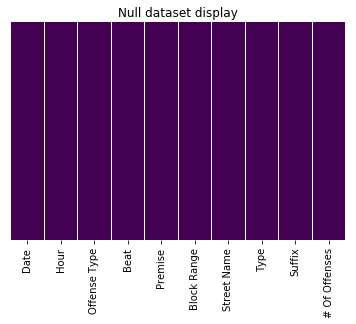

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [10]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
Date           127771 non-null datetime64[ns]
Hour           127771 non-null int64
OffenseType    127771 non-null object
Beat           127771 non-null object
Premise        127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
Type           127771 non-null object
Suffix         127771 non-null object
NumOffenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [11]:
df.apply(lambda x: sum(x.isnull()))

Date           0
Hour           0
OffenseType    0
Beat           0
Premise        0
BlockRange     0
StreetName     0
Type           0
Suffix         0
NumOffenses    0
dtype: int64

## Subset dataframe to work on 

In [12]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 8 columns):
Date           127771 non-null datetime64[ns]
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null int64
Hour           127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.8+ MB


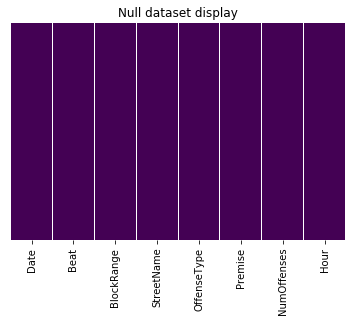

In [13]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Join datafames
 join premise df with crime to extract num values

In [14]:
crimes.Premise.value_counts(dropna=False)[:10]

20A    16963
20R    16740
18A    15070
13R     9323
20D     7823
18O     6498
080     5651
18R     3697
250     3642
18P     2947
Name: Premise, dtype: int64

In [15]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127774 entries, 0 to 127773
Data columns (total 9 columns):
Date                   127771 non-null datetime64[ns]
Beat                   127771 non-null object
BlockRange             127771 non-null object
StreetName             127771 non-null object
OffenseType            127771 non-null object
Premise                127774 non-null object
NumOffenses            127771 non-null float64
Hour                   127771 non-null float64
Premise Description    127148 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.7+ MB


In [16]:
crimes[['Premise', 'Premise Description']].head(20)

,Premise,Premise Description
0,20R,RESIDENCE/HOUSE
1,20R,RESIDENCE/HOUSE
2,20R,RESIDENCE/HOUSE
3,20R,RESIDENCE/HOUSE
4,20R,RESIDENCE/HOUSE
5,20R,RESIDENCE/HOUSE
6,20R,RESIDENCE/HOUSE
7,20R,RESIDENCE/HOUSE
8,20R,RESIDENCE/HOUSE
9,20R,RESIDENCE/HOUSE


In [17]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2012-04-05,17E40,6100-6199,CLARIDGE,Murder,20R,1.0,2.0,RESIDENCE/HOUSE
1,2012-04-21,8C10,6200-6299,RIETTA,Murder,20R,1.0,23.0,RESIDENCE/HOUSE
2,2012-04-30,7C20,4000-4099,LIBERTY,Murder,20R,1.0,8.0,RESIDENCE/HOUSE
3,2012-04-12,7C50,19400-19499,BORDERS,Rape,20R,1.0,4.0,RESIDENCE/HOUSE
4,2012-04-23,16E20,4100-4199,KNOTTY OAKS,Rape,20R,1.0,8.0,RESIDENCE/HOUSE


In [18]:
crimes.apply(lambda x: sum(x.isnull()))

Date                     3
Beat                     3
BlockRange               3
StreetName               3
OffenseType              3
Premise                  0
NumOffenses              3
Hour                     3
Premise Description    626
dtype: int64

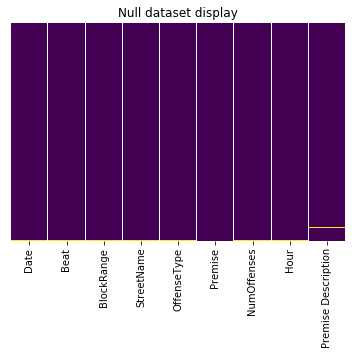

In [19]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [20]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
120221,2012-04-26,19G40,12200-12299,DAIRY ASHFORD,Robbery,---,1.0,22.0,NaN
120222,2012-04-01,2A50,1300-1399,UTAH,Aggravated Assault,---,1.0,2.0,NaN
120223,2012-04-05,11H10,7700-7799,CAPITOL,Aggravated Assault,---,1.0,16.0,NaN
120224,2012-04-18,2A20,600-699,CAVALCADE,Aggravated Assault,---,1.0,10.0,NaN
120225,2012-04-11,17E40,6600-6699,BELLFORT,Aggravated Assault,---,1.0,19.0,NaN


In [21]:
len(crimes[crimes['Premise'] == '---'])

582

In [22]:
len(crimes[crimes['Premise'] == 'N'])

26

In [23]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [24]:
len(crimes[crimes['Premise Description'].isnull()])

0

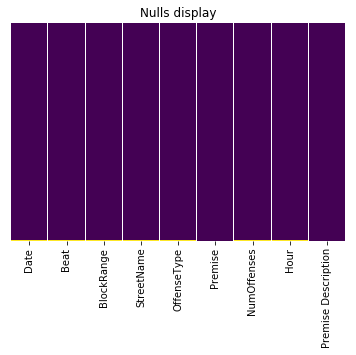

In [25]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [26]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   3
Beat                   3
BlockRange             3
StreetName             3
OffenseType            3
Premise                0
NumOffenses            3
Hour                   3
Premise Description    0
dtype: int64

## drop rows with 2 or 3 missing values

In [27]:
#crimes = crimes.dropna(thresh=3)
crimes = crimes.dropna(subset=['Date'])

In [28]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [29]:
crimes = crimes.dropna(thresh=3)

In [30]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

# FIND NAN

## Find NaN
- drop if > 2 nan

In [31]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [32]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Problem
- find nan values and fix

In [33]:
null_premise = crimes.Premise.isnull()

In [34]:
crimes['Premise'] = crimes["Premise"].fillna('none')
crimes['Premise Description'] = crimes["Premise Description"].fillna('none')

In [35]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

## Inspect each column

In [36]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat column
- total beats should be around 120

In [37]:
len(crimes.Beat.value_counts())

121

In [38]:
len(crimes.Beat.value_counts(dropna=False))

121

In [39]:
crimes.Beat.unique()[:10]

array(['17E40', '8C10', '7C20', '7C50', '16E20', '10H10', '2A10', '6B10',
       '7C10', '1A10'], dtype=object)

In [40]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [41]:
len(crimes.Beat.value_counts(dropna=False))

121

In [42]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [43]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [44]:
crimes.Beat.unique()

array(['17E40', '8C10', '7C20', '7C50', '16E20', '10H10', '2A10', '6B10',
       '7C10', '1A10', '3B10', '3B40', '6B30', '20G70', '3B50', '14D10',
       '15E20', '14D30', '11H30', '10H50', '19G30', '12D10', '14D20',
       '19G40', '16E10', '12D20', '3B30', '13D10', '17E20', '12D40',
       '5F30', '6B20', '18F50', '8C40', '18F10', '5F20', '8C60', '6B40',
       '12D60', '15E30', '8C30', '19G20', '8C50', '17E30', '14D40',
       '12D70', '9C40', '8C20', '10H40', '20G80', '11H40', '20G40',
       '2A30', '16E40', '7C30', '13D20', '2A20', '2A50', '10H20', '16E30',
       '20G50', '15E10', '10H60', '6B50', '11H20', '11H10', '9C30',
       '9C20', '13D40', '20G20', '18F60', '24C30', '4F20', '5F10', '4F30',
       '1A20', '17E10', '19G50', '18F20', '24C10', '4F10', '2A40', '1A30',
       '18F30', '20G30', '18F40', '24C60', '19G10', '1A40', '10H80',
       '7C40', '5F40', '2A60', '9C10', '20G60', '14D50', '23J40', '10H70',
       '13D30', '10H30', '11H50', '12D50', '6B60', '24C20', '1A50',


In [45]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2973
19G10    2832
6B60     2797
3B10     2476
13D20    2397
Name: Beat, dtype: int64

## BlockRange

In [46]:
len(crimes.BlockRange.value_counts(dropna=False))

243

In [47]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1828
100-199      1725
9400-9499    1681
4400-4499    1534
800-899      1503
Name: BlockRange, dtype: int64

In [48]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [49]:
len(crimes.BlockRange.value_counts(dropna=False))

243

## StreetName

In [50]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7553


In [51]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [52]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7553


In [53]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer    3534
gessner       2000
gulf          1909
richmond      1786
north         1738
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [54]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [55]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [56]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [57]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67978
Burglary              26630
Auto Theft            12672
Aggravated Assault    10238
Robbery                9385
Rape                    663
Murder                  205
Name: OffenseType, dtype: int64


In [58]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [59]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [60]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67978
Burglary              26630
Auto Theft            12672
Aggravated Assault    10238
Robbery                9385
Rape                    663
Murder                  205
Name: OffenseType, dtype: int64


## Premise

In [61]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

crimes['Premise Description'] = crimes['Premise Description'].str.strip()

crimes['Premise Description'] = crimes['Premise Description'].str.lower()

before:126


In [62]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:126


In [63]:
crimes['Premise Description'].value_counts(dropna=False).head()

apartment                16963
residence/house          16740
apartment parking lot    15070
road/street/sidewalk      9323
driveway                  7823
Name: Premise Description, dtype: int64

# Date column

In [64]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Date
- make datetime index

In [65]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [66]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1973-11-16,1A30,2500-2599,richmond,Theft,210,1.0,13.0,restaurant/cafeteria
1975-05-17,4F30,1800-1899,barker cypress,Robbery,20A,1.0,15.0,apartment
1979-07-07,18F50,3400-3499,dunvale,Burglary,20A,1.0,2.0,apartment
1982-01-01,19G30,13000-13099,leader,Rape,20A,1.0,15.0,apartment
1987-03-20,18F30,6300-6399,windswept,Theft,05N,1.0,0.0,maintenance/building services


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [67]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [68]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1973-11-16,1A30,2500-2599,richmond,Theft,210,1.0,13.0,restaurant/cafeteria,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,barker cypress,Robbery,20A,1.0,15.0,apartment,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,dunvale,Burglary,20A,1.0,2.0,apartment,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,leader,Rape,20A,1.0,15.0,apartment,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,windswept,Theft,05N,1.0,0.0,maintenance/building services,20,Friday,Mar,1987


In [69]:
crimes.year.value_counts(dropna=False)

2012    126198
2011      1297
2010       112
2009        25
2008        23
2005        20
2007        15
2006        15
2000        13
2001        11
2004        10
1999         4
2002         4
2003         4
2013         2
1994         2
1989         2
1987         1
1996         1
2014         1
2020         1
1975         1
1988         1
1973         1
1998         1
1982         1
2029         1
2021         1
1993         1
1979         1
1997         1
Name: year, dtype: int64

We can see now that many reports have incorect year

## null values

- check
- count
- display

In [70]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [71]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [72]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [73]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [74]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1973-11-16,1A30,2500-2599,richmond,Theft,restaurant/cafeteria,1.0,13.0,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,barker cypress,Robbery,apartment,1.0,15.0,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,dunvale,Burglary,apartment,1.0,2.0,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,leader,Rape,apartment,1.0,15.0,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,windswept,Theft,maintenance/building services,1.0,0.0,20,Friday,Mar,1987


In [75]:
crime_yr.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise Description    0
NumOffenses            0
Hour                   0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [76]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)


In [77]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1973-11-16,1A30,2500-2599,richmond,Theft,restaurant/cafeteria,1.0,13.0,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,barker cypress,Robbery,apartment,1.0,15.0,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,dunvale,Burglary,apartment,1.0,2.0,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,leader,Rape,apartment,1.0,15.0,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,windswept,Theft,maintenance/building services,1.0,0.0,20,Friday,Mar,1987


## Save

In [78]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127771 entries, 1973-11-16 to 2029-05-26
Data columns (total 11 columns):
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null float64
Hour           127771 non-null float64
day            127771 non-null object
weekday        127771 non-null object
month          127771 non-null object
year           127771 non-null object
dtypes: float64(2), object(9)
memory usage: 11.7+ MB


In [79]:
crime_yr.to_csv('data/clean/crime12_clean.csv')

In [80]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
